<a href="https://colab.research.google.com/github/hjn14133/Machine-Learning/blob/main/RF_cotton_Loan_Rate_EC_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv('FT_EC_SP_JOIN_2020.csv')


In [17]:
# Load data set
X = df[['DISTANCE_1', 'Heading_1','Elevation', 'AppliedRat', 'EC_0_2']]
y1 = df['VRYIELDBAL']
y2 = df['Loan_Rat']

print('The shape of our features is:', X.shape)

The shape of our features is: (5720, 5)


In [18]:
# Descriptive statistics for each column
X.describe()

,DISTANCE_1,Heading_1,Elevation,AppliedRat,EC_0_2
count,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000
mean,6.860106,94.270339,165.194536,25863.892487,5.015344
std,0.897423,97.592399,1.881384,4915.607774,1.456430
min,0.449588,0.001562,160.791272,0.000000,1.660000
25%,6.901559,0.378750,163.822608,22565.271410,4.030000
50%,6.978460,1.050156,165.165567,24807.229870,4.900000
75%,7.032793,180.325234,166.551927,30371.657450,5.880000
max,14.165783,359.992157,169.551115,76489.633240,11.140000


In [19]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_x, test_x, train_y2, test_y2 = train_test_split(X, y2, test_size = 0.2,
                                                      random_state = 42)

In [20]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_x, train_y2);

In [21]:
print('Training Coefficient of R^2 : %.3f'%rf.score(train_x, train_y2))
print('Test Coefficient of R^2 : %.3f'%rf.score(test_x, test_y2))

Training Coefficient of R^2 : 0.939
Test Coefficient of R^2 : 0.595


In [22]:
import numpy as np
# Use the forest's predict method on the test data
predictions = rf.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y2)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Mean Absolute Error: 0.12 .


In [23]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y2)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.79 %.


In [24]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
feature_list = list(X.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Elevation            Importance: 0.27
Variable: AppliedRat           Importance: 0.24
Variable: DISTANCE_1           Importance: 0.17
Variable: EC_0_2               Importance: 0.17
Variable: Heading_1            Importance: 0.16


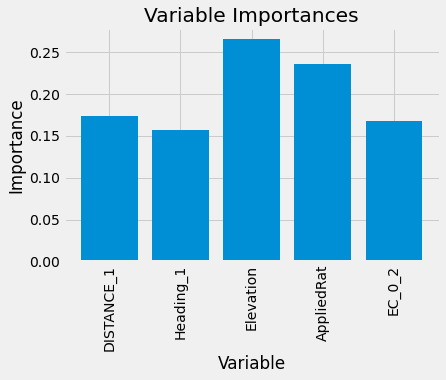

In [25]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

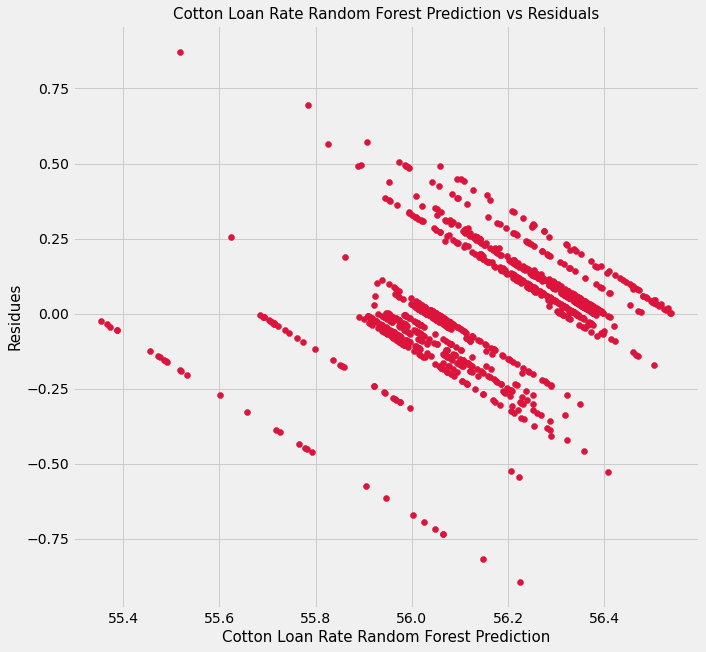

In [26]:
# Plot actual data and predictions 

plt.figure(figsize=(10,10))
plt.scatter(predictions, (test_y2-predictions), c='crimson')

#plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Cotton Loan Rate Random Forest Prediction vs Residuals', fontsize=15)
plt.xlabel('Cotton Loan Rate Random Forest Prediction', fontsize=15)
plt.ylabel('Residues', fontsize=15)
plt.show()

In [27]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [28]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [29]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# TOOK 1h 10mins to tune the model 
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=0, random_state=42, 
                               n_jobs = None)
# Fit the random search model
rf_random.fit(train_x, train_y2)
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [30]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [31]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
base_model.fit(train_x, train_y2)
base_accuracy = evaluate(base_model, test_x, test_y2)

Model Performance
Average Error: 0.1154.
Accuracy = 99.79%.


In [32]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_x, test_y2)

print('Training Coefficient of R^2 : %.3f'%best_random.score(train_x, train_y2))
print('Test Coefficient of R^2 : %.3f'%best_random.score(test_x, test_y2))

Model Performance
Average Error: 0.1083.
Accuracy = 99.81%.
Training Coefficient of R^2 : 1.000
Test Coefficient of R^2 : 0.621


In [33]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.01%.
